In [1]:
import math
import numpy as np
import random
from numpy.random import randint
import matplotlib.pyplot as plt

GN = 100
PN = 100
CO = 0.75
MO = 0.5
Hassasiyet = 3
Xmin = [-5,-5]
Xmax = [5, 5]
BestFitness = 0
ParNumber = len(Xmin)
Population = np.zeros((PN, 2))
Fitness = np.zeros((PN, 1), dtype = float)

import random
def rndarray(size):
    ax = []
    for _ in range(size):
        ax.append(round(random.random(),5))
        #print(ax)
    return ax

def InitiatePopulation():
    for i in range(PN):
        Population[i, 0] = Xmin[1] + round(random.random(),5)*(Xmax[0]-Xmin[0])
        Population[i, 1] = Xmin[1] + round(random.random(),5)*(Xmax[1]-Xmin[1])
    #Population[:, 2] = Xmin[2] + rand[1, PN)*(Xmax(2)-Xmin(2));
    return(Population)

def EvaluateFitness(Population):
    for j in range(PN):
        X1 = Population[j, 0]        
        X2 = Population[j, 1]
        Fitness[j,0] = 100*math.pow((X2-math.pow(X1,2)),2)+math.pow((X1-1),2)
def Selection(Population):
    Probability = Fitness / sum(Fitness)
    Cumulative = np.cumsum(Probability)
    RandomNum = rndarray(PN)
    #print(Cumulative)
    #print(RandomNum)
    #print(np.where(RandomNum < Cumulative[5]))

    for j in range(PN):
        #print("*")
        #print(np.where(RandomNum < Cumulative[j]))
        ind = np.where(RandomNum < Cumulative[j])
        #print(ind[0])
        #print(len(ind[0]))
        if len(ind[0])>0:        
            #print(j*np.ones(len(ind[0])))
            #print(ind[0][0])
            for k in range(len(ind[0])):
                #print("---")
                #print(RandomNum[ind[0][k]])            
                RandomNum[ind[0][k]] = j

    #print(Population)
    Population = Population[RandomNum,:]

def Crossover(Population):
    RandomCNum = rndarray(PN)
    index=[]
    index = [j for j in range(PN)  if RandomCNum[j] < CO] #np.where(RandomCNum < cox[0])
    CONum = len(index)
    while(CONum<math.ceil(PN*CO)):
        index.append(random.randint(0,PN))
        #if index[CONum]==0:
        #    continue
        CONum = len(index)

    while(CONum > math.ceil(PN*CO)):
        index.pop(CONum-1)
        CONum = len(index)

    while CONum % 2 == 1:
        index.append(random.randint(0,PN))
        #if index[CONum]==0:
        #    continue
        CONum = len(index)

    #print(sum(Population))
    #print(CONum)
    for j in range(round(CONum/2)):
        CrossPoint = math.ceil(random.random() * (ParNumber))-1
        Beta = random.random()
        #print(len(index))
        Param1 = Beta * Population[index[2*j], CrossPoint] + (1 - Beta) * Population[index[2*j+1], CrossPoint]
        Param2 = (1 - Beta) * Population[index[2*j], CrossPoint] + Beta * Population[index[2*j+1], CrossPoint]
        #print(Param1)
        Population[index[2*j], CrossPoint] = Param1
        Population[index[2*j+1], CrossPoint] = Param2


def Mutation():
    RandomMNum = rndarray(PN*ParNumber)
    index = [j for j in range(PN)  if RandomMNum[j] < MO]
    MONum = len(index)
    #print(MONum)
    #print(index)
    for j in range(MONum):
        Kromozom = math.ceil(index[j]/ParNumber)
        Konum = index[j] % ParNumber
        #print("kro "+str(Kromozom))
        #print(Konum)
        if Konum == 0:
            Konum = ParNumber - 1
        xcx = Xmin[Konum] + random.random() * (Xmax[Konum]-Xmin[Konum]) # edit
        #print(xcx)
        Population[Kromozom,Konum] = xcx

        
BestFitnessArray=[]
SumFitnessArray=[]
minFitnessArray=[]

Population = InitiatePopulation()
EvaluateFitness(Population)

minFitness = min(Fitness)[0]
minIndex = np.where(Fitness==minFitness)
BestFitness = minFitness
BestGN=0
BestPop=Population
BestIndex=minIndex
#plt.axis([0, 100, 0, BestFitness])
for i in range(GN):
    if(minFitness < BestFitness):
        BestFitness = minFitness
        BestGN = i
        BestPop = Population
        BestIndex = minIndex
        #print(BestFitness)
        
    Selection(Population)
    try:
        Crossover(Population)
    except:
        print()
    if(i < GN):
        Mutation()
    EvaluateFitness(Population)
    minFitness = min(Fitness)[0]
    minIndex = np.where(Fitness==minFitness)
    print(str(i)+"\t"+str(BestFitness)+"\t"+str(sum(Fitness)))
    
    BestFitnessArray.append(BestFitness)
    SumFitnessArray.append(sum(Fitness))
    minFitnessArray.append(minFitness)

plt.subplot(3, 1, 1)
plt.plot(BestFitnessArray)
plt.subplot(3, 1, 2)
plt.plot(SumFitnessArray)
plt.subplot(3, 1, 3)
plt.plot(minFitnessArray)

plt.show()

print("last")
print(BestFitness)
print(BestGN)


0	7.706756673503212	[1356752.01378753]
1	0.18065945809036277	[1238106.86788733]
2	0.18065945809036277	[933207.7561064]
3	0.06834706555207543	[770985.32472337]

4	0.06834706555207543	[643560.94874353]
5	0.005829649066372324	[516644.34971053]
6	0.005829649066372324	[438135.69047931]
7	0.005829649066372324	[382612.0647267]
8	0.005829649066372324	[342606.16509557]
9	0.005829649066372324	[284754.89083128]
10	0.005829649066372324	[268198.24046288]
11	0.005829649066372324	[270992.17479526]
12	0.005829649066372324	[221793.09566827]
13	0.005829649066372324	[211376.42717258]
14	0.005829649066372324	[167424.95236803]
15	0.005829649066372324	[166268.2068752]
16	0.005829649066372324	[161956.98048211]
17	0.005829649066372324	[110261.65372252]
18	0.005829649066372324	[115835.91524458]
19	0.005829649066372324	[123139.97642631]
20	0.005829649066372324	[127700.76399455]
21	0.005829649066372324	[108552.5585224]
22	0.005829649066372324	[107280.096579]
23	0.005829649066372324	[117026.65546751]
24	0.005829

<Figure size 640x480 with 3 Axes>

last
0.005829649066372324
5


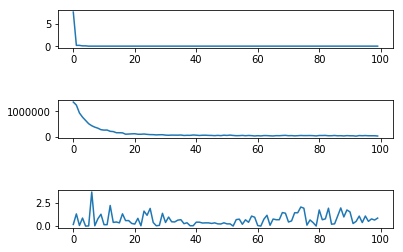

In [2]:
fig = plt.figure()
plt.subplot(5, 1, 1)
plt.plot(BestFitnessArray)
plt.subplot(5, 1, 3)
plt.plot(SumFitnessArray)
plt.subplot(5, 1, 5)
plt.plot(minFitnessArray)
fig.savefig('temp.png', dpi=fig.dpi)
plt.show()